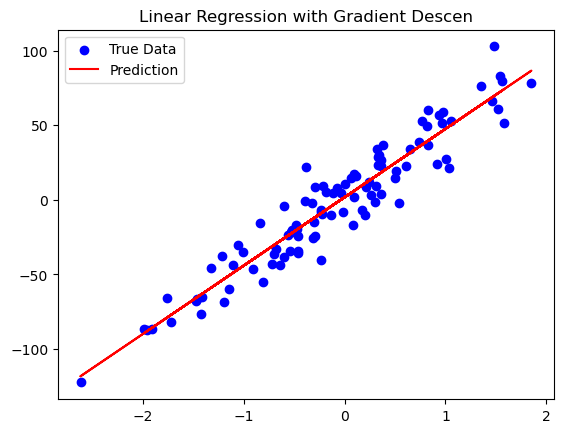

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#here I want to experiment how GD behave in regression and classification 
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='True Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.title("Linear Regression with Gradient Descen")
plt.legend()
plt.show()